In [627]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pymc as pm
import scipy.stats as sps

sns.set()


mean 0.24789880505176057
50% probability waiting time is less than 10.4 minutes


0.3934693402873666

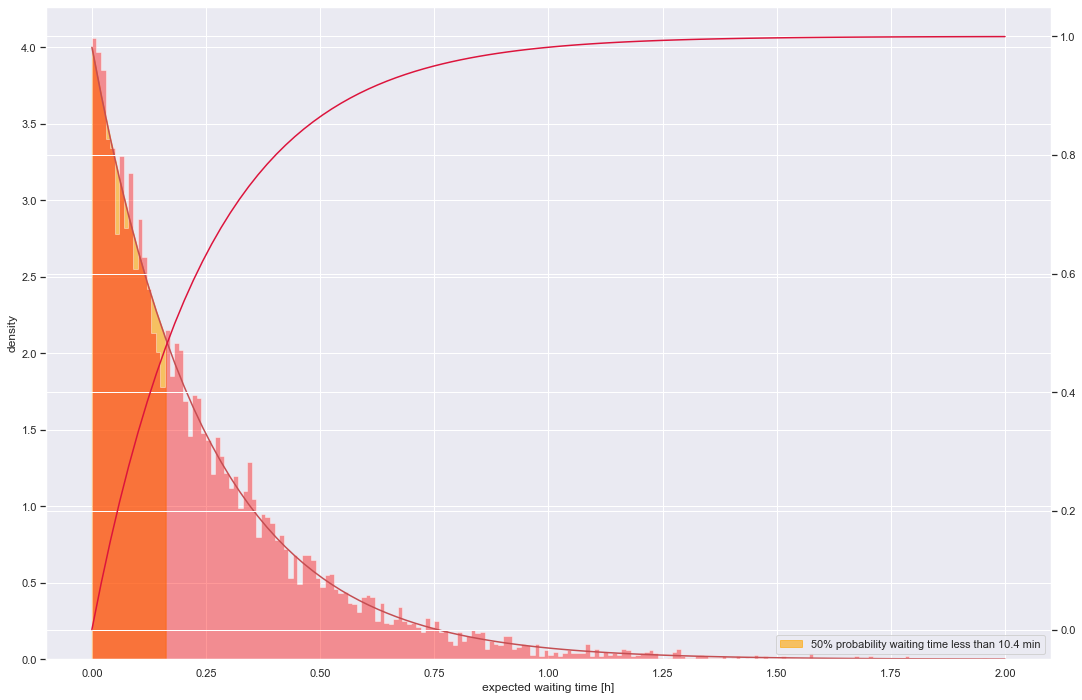

In [628]:
lambda_ = 4 # bus interarrival time 0.25 h => rate 4 busses per hour 

expo = pm.Exponential('expo',lambda_)

expo_samples = np.array([expo.random() for i in range(10000)])
print ('mean',expo_samples.mean())

plt.figure(figsize=(18,12))
ax = plt.gca()
ax2 = plt.twinx()

_= ax.hist(expo_samples,bins=list(np.arange(0,2,0.01)),color='red',
           density=True,alpha=0.4,histtype='stepfilled')

###
### the scale parameter of scipy corresponds to std.dev and std dev for exponential is 1/lambda
###

ppf = sps.expon.ppf(0.5,loc=0,scale=1/lambda_) #50% probability falls under value of ppf
print ('50% probability waiting time is less than {:.1f} minutes'.format(ppf * 60))

x = np.linspace(0,2,100)

where = np.zeros_like(x)
mask = x <= ppf

where[mask] = True

pdf = sps.expon.pdf(x,loc=0,scale = 1/lambda_)

ax.fill_between(x,y1=0,y2=pdf,color='orange',alpha=0.6,where=where,
                label='50% probability waiting time less than {:.1f} min'.format(ppf * 60))

ax.set_xlabel('expected waiting time [h]')
ax.set_ylabel('density')


ax.plot(x,pdf,color='r')

cdf = sps.expon.cdf(x,loc=0,scale=1/lambda_)
ax2.plot(x,cdf,color='crimson')
ax.legend(loc='lower right')

p_less_than_seven_and_half_min = sps.expon.cdf(7.5/60,loc=0,scale=1/lambda_)
p_less_than_seven_and_half_min

3.9849


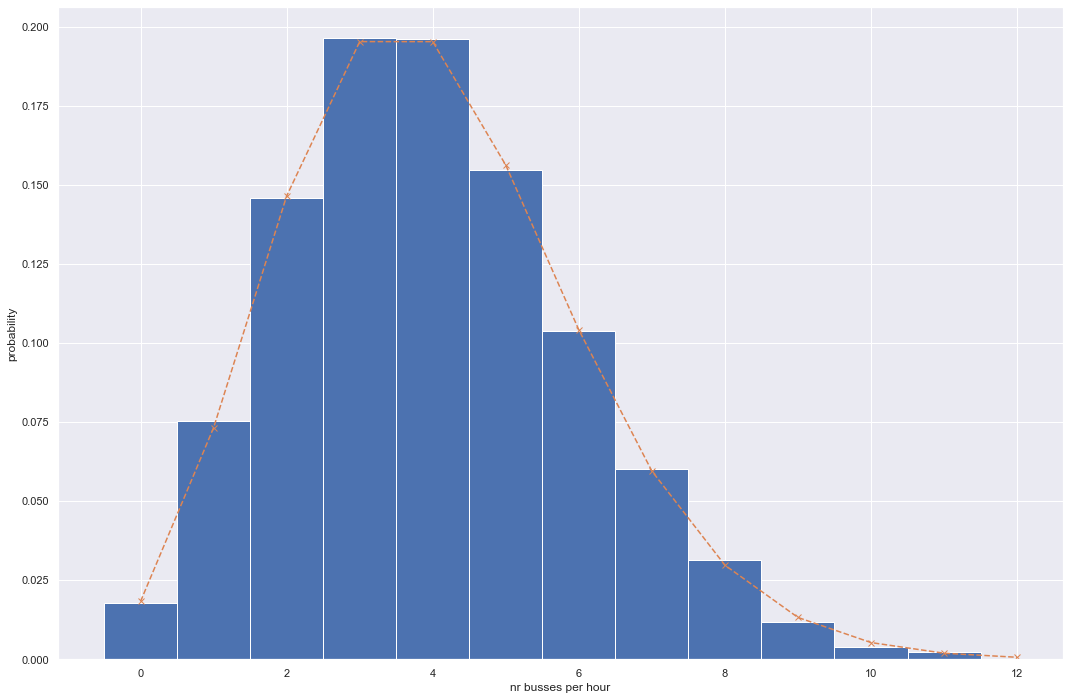

In [629]:
plt.figure(figsize=(18,12))
pois = pm.Poisson('pois',lambda_)
pois_samples = np.array([pois.random() for i in range(10000)])
print (pois_samples.mean())
_= plt.hist(pois_samples,density=False,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],
            weights=np.ones_like(pois_samples) / len(pois_samples),align='left')
plt.xlabel('nr busses per hour')
plt.ylabel('probability')

poss_x = np.arange(0,13)
poss_pmf = sps.poisson.pmf(poss_x,lambda_,loc=0)

plt.plot(poss_x,poss_pmf ,'x--')

average waiting time 4.97 min (0.08 h)
avereage nr of cars (events) per hour 12.06
min 0
max 33
mode ModeResult(mode=array([0]), count=array([1569]))


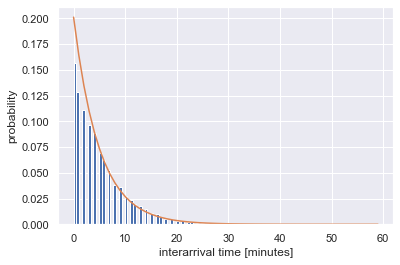

In [742]:
#### cars passing
### generate uniform random arrival times 0..59, that is each minute of the hour,for each car.
### 
### 
nr_samples = 10000

nr_cars = 10 #average number of departures per hour

wait_time = np.array([min(pm.rdiscrete_uniform(0,59,nr_cars)) for i in range(nr_samples)])

print  ('average waiting time {:.2f} min ({:.2f} h)'.format(wait_time.mean(),wait_time.mean()/60))
print ('avereage nr of cars (events) per hour {:.2f}'.format( 60 * 1 / wait_time.mean()))

_=plt.hist(wait_time,bins=60,weights=np.ones_like(wait_time) / len(wait_time))
plt.xlabel('interarrival time [minutes]')
plt.ylabel('probability')

#scale param for pdf is standard deviation of exponential distribution, 1/lambda, i.e. inverse of wait_time
pdf = sps.expon.pdf(range(60),loc=0,scale=wait_time.mean())
plt.plot(range(60),pdf)
print ('min',wait_time.min())
print ('max',wait_time.max())
print ('mode',sps.mode(wait_time))

min 0
max 10
mean 2.0493
mode ModeResult(mode=array([2]), count=array([2700]))


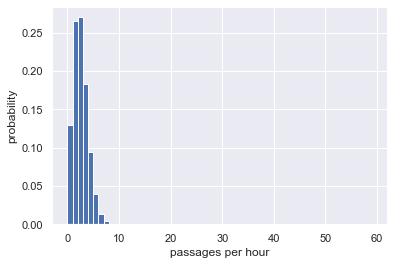

In [644]:
samples = pm.rpoisson(60 * 1 / wait_time.mean(),10000)
plt.hist(samples,bins=range(60),weights=np.ones_like(samples) / len(samples))
plt.xlabel('passages per hour')
plt.ylabel('probability')
print ('min',samples.min())
print ('max',samples.max())
print ('mean',samples.mean())
print ('mode',sps.mode(samples))

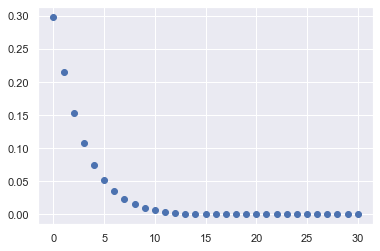

In [745]:
nr_components = 10

deltas = np.arange(0,31) # minutes between events

taljare = np.ones_like(deltas) # 1/60 to pick 0 or 30 min delta, others in interval 2/60
#taljare[1:-1] *= 2

namnare = np.ones_like(deltas) * 60 

p_minute = np.power(taljare / namnare,nr_components)

min_p_taljare = np.arange(31,0,-1) # since we always pick min minute of events, the longer waiting times have less p
min_p_namnare = np.ones_like(min_p_taljare) * 31

p_minute_minimum = min_p_taljare / min_p_namnare

p_wait = p_minute * p_minute_minimum 

p_wait = np.power(p_wait,nr_components) 
p_wait = p_wait / p_wait.sum()
plt.plot(p_wait,'o')

